The goal here is to test the shape outputs from the version of the code in this repo vs. that from [Hongyu's](https://github.com/HongyuLi2016/illustris-tools ) from which we an output (for Illustris-1 cutouts).

In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline

Run the code to get shapes for two haloIDs.

In [2]:
%%bash

data_dir='../outputs/test_illustris/'

python /Users/humnaawan/repos/3D-galaxies-kavli/runscripts/run_get_shapes.py --data_dir=${data_dir}

Getting shape data for halo 5
Saved shape_100Rvals.dat
## Time taken: 38.79 s

Getting shape data for halo 16941
Saved shape_100Rvals.dat
## Time taken: 54.12 s



In [3]:
# plot style
from d3g2d import rcparams
import matplotlib.ticker as mtick
for key in rcparams: mpl.rcParams[key] = rcparams[key]

Now read in the just-saved data as well as that from Hongyu's original code.

Considering halo 16941
Reading shape_100Rvals.dat


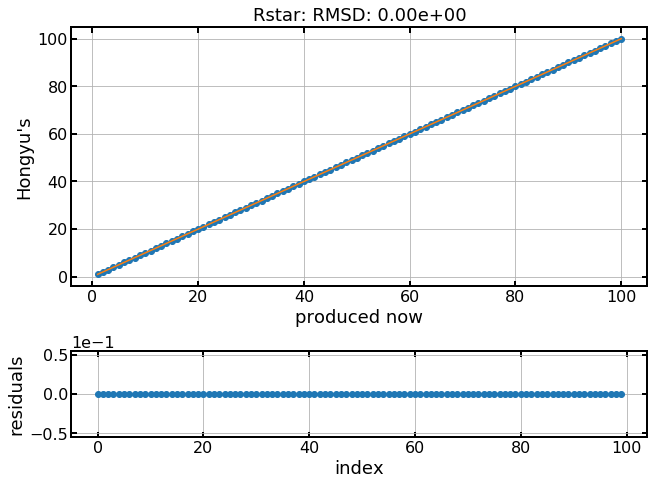

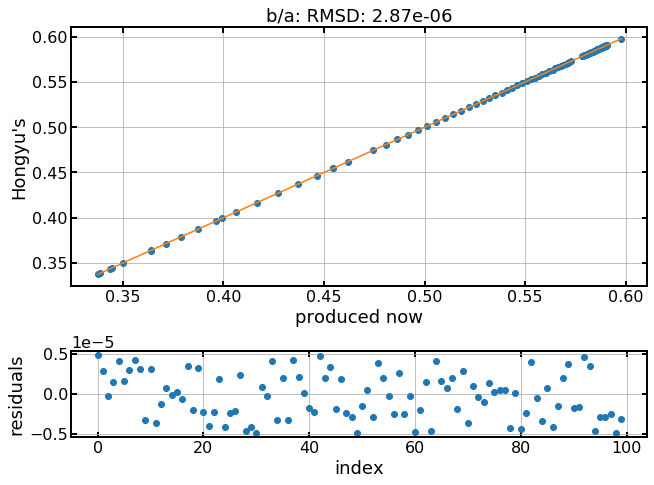

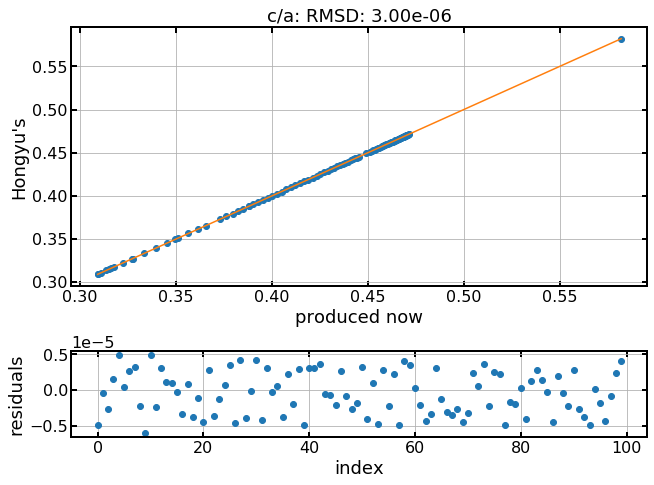

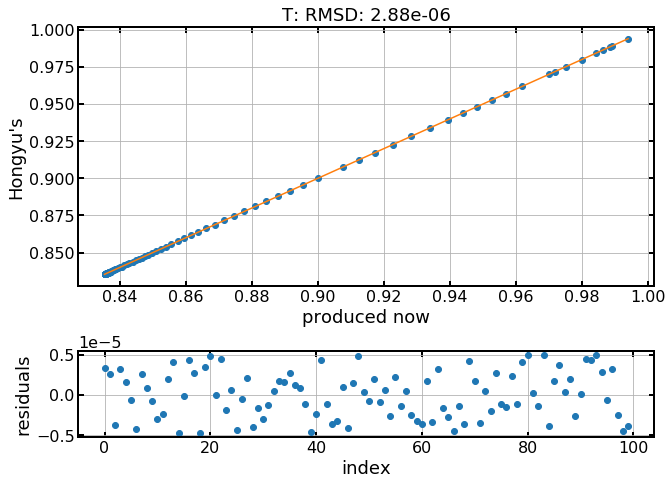

Considering halo 5
Reading shape_100Rvals.dat


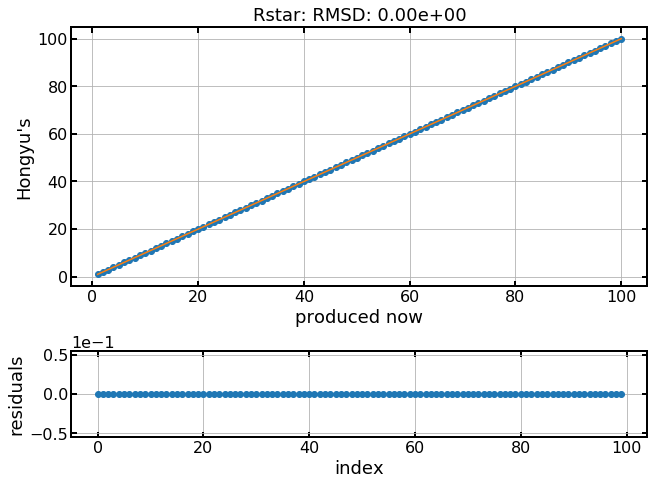

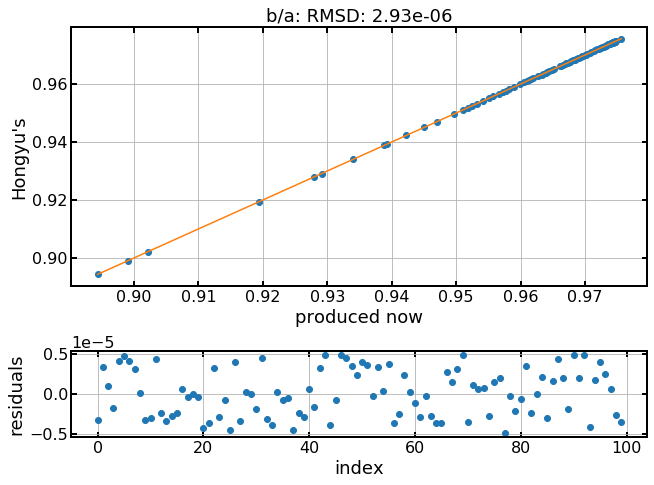

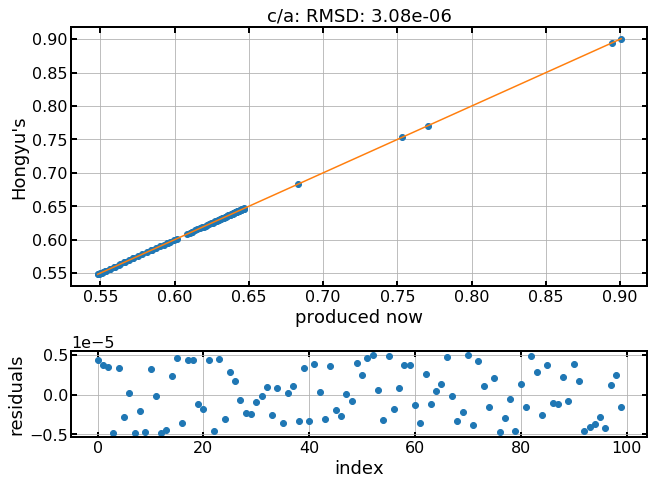

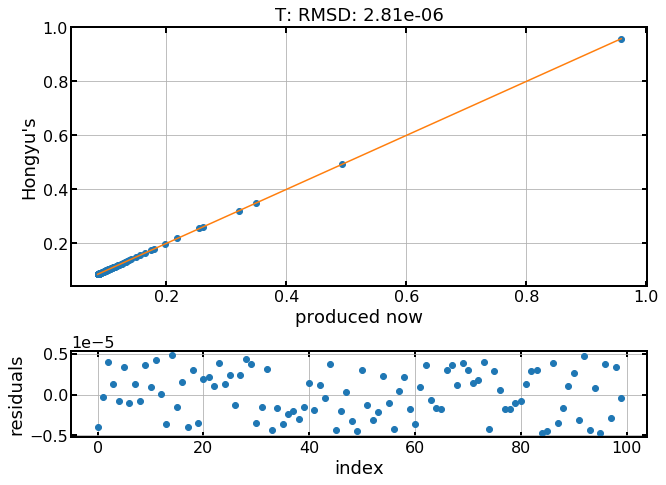

In [4]:
data_dir = '../outputs/test_illustris/'
# loop over the local foders; each folder is for a specific halo
for folder in [f for f in os.listdir(data_dir) if f.startswith('Illustris')]:
    haloId = folder.split('halo')[-1].split('_')[0]
    print('Considering halo %s' % haloId)
    # ---------------------------------------------------------------------
    # first read in the data from Hongyu's catalog
    data_orig = np.loadtxt( '../data/illustris_mass_shape/shape-all-11p0/shape_subhalo%s.dat' % haloId )
    # set up the dictionary
    data_orig = {'Rstar': data_orig[:, 0],
                 'b/a': data_orig[:, 1],
                 'c/a': data_orig[:, 2],
                 'T': data_orig[:, 3]
                }
    # ---------------------------------------------------------------------
    # now read in the data produced from my version
    file = [ f for f in os.listdir('%s/%s' % (data_dir, folder)) if f.startswith('shape_')][0]

    print('Reading %s' % (file))
    with open('%s/%s/%s' % (data_dir, folder, file), 'rb') as f:
        data_now = pickle.load(f)
    # add triaxility param
    data_now['T'] = (1 -  data_now['b/a'] ** 2 ) / (1 -  data_now['c/a'] ** 2 )
    
    # ---------------------------------------------------------------------
    # plot the data + residuals  
    for key in data_now:
        min_val = min([min(data_now[key]), min(data_orig[key])])
        max_val = max([max(data_now[key]), max(data_orig[key])])
        
        
        fig = plt.figure()
        # plot the data
        f1 = fig.add_axes((.1,.3,.8,.6))
        plt.plot(data_now[key], data_orig[key], 'o')
        plt.plot([min_val, max_val], [min_val, max_val], '-')
        rmsd = np.sqrt(np.sum((data_orig[key]-data_now[key])**2)/len(data_orig[key]))
        plt.title('%s: RMSD: %.2e'% (key, rmsd) )
        plt.ylabel("Hongyu's")
        plt.xlabel('produced now')
        # now plot the residuals
        f2 = fig.add_axes((.1,-0.05,.8,.2))        
        plt.plot(data_now[key] - data_orig[key], 'o')
        plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.ylabel('residuals')
        plt.xlabel('index')
        
        plt.show()
        

Okay things look reasonable.